# Import packages

In [7]:
import os
import re
import time
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import yahoo_crawler
yc = yahoo_crawler.yahoo_crawler()

yahooo_crawler


In [8]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.facecolor'] = '1.'
plt.rcParams["axes.axisbelow"] = False

# Update local stock list

In [9]:
def update_stocklist_data():
    ''' Functions for update stocklist data
    Source: www.nasdaq.com
    '''
    # create stock_list data folder
    folder = os.getcwd() + '\\stock_list\\'
    if not os.path.exists(folder):
        os.makedirs(folder)

    # soure url
    url = 'https://www.nasdaq.com/screening/companies-by-name.aspx?letter=0&exchange=%s&render=download'

    # available exhanges
    exchange = ['nasdaq', 'nyse', 'amex']

    for exchg in exchange:
        resp = requests.get(url%exchg)
        with open(folder + '%s.xlsx'%exchg, 'wb') as output:
            output.write(resp.content)
    pass

# update stock_list
update_stocklist_data()

# Read local stock list

In [10]:
# data folder
folder = os.getcwd() + '\\stock_list\\'

# file names
files = os.listdir( folder )

stolis_df_list = []
for f in files:
    df = pd.read_csv( folder + f )
    stolis_df_list.append(df)
    print(f.upper(),df.shape, '\n==================================================\n',
          df[['Name']].head() )
    print('==================================================\n')

# concatenate companies from three exhanges
stolis_df_ = pd.concat(stolis_df_list, axis = 0)

# drop out fund
stolis_df_ = stolis_df_[stolis_df_['industry'] == stolis_df_['industry']]

# drop dupplicated company names
stolis_df = stolis_df_.drop_duplicates(['Name']).reset_index(drop = True)

print('Total %s companies, unique %s companies.' % (stolis_df_.shape[0], stolis_df.shape[0]))

AMEX.XLSX (309, 9) 
                                                 Name
0                            22nd Century Group, Inc
1              Aberdeen Asia-Pacific Income Fund Inc
2                 Aberdeen Australia Equity Fund Inc
3  Aberdeen Emerging Markets Equity Income Fund, ...
4                  Aberdeen Global Income Fund, Inc.

NASDAQ.XLSX (3447, 9) 
                                      Name
0                               111, Inc.
1  1347 Property Insurance Holdings, Inc.
2  1347 Property Insurance Holdings, Inc.
3                180 Degree Capital Corp.
4                 1-800 FLOWERS.COM, Inc.

NYSE.XLSX (3108, 9) 
                      Name
0  3D Systems Corporation
1              3M Company
2         500.com Limited
3             58.com Inc.
4                 8x8 Inc

Total 5304 companies, unique 4793 companies.


# Fetch yahoo finance stock data

In [24]:
def get_stock_data(symbol, start, end):
    t = time.time()
    cookie,crumb = yc.get_yahoo_crumb_cookie()

    symbol = symbol# stock id
    params = {'period1' : start,
              'period2' : end,
              'interval': '1d',
              'events'  : 'history',
              'crumb'   : crumb}
    df = yc.GetStockPrice(symbol = symbol,
                               params = params,
                               request_type = 'post')
    
    df = df.set_index('Date')
    t2 = time.time() - t
    print(str(round(t2,4))+' seconds elapsed...')
    return df[['Adj Close']]

In [ ]:

def reindex_data(df, standard_index):

# Fetch marked tweets data

In [22]:
tweets = pd.read_excel('marked_tweets.xlsx')
tweets.head()

,tweets,companies,created_at
0,why would smart voters want to put democrats ...,"['PUHUI WEALTH INVESTMENT MANAGEMENT CO., LTD.']",2017-12-31 13:36:32
1,big protests in iran. the people are finally ...,"['PUHUI WEALTH INVESTMENT MANAGEMENT CO., LTD.']",2017-12-31 13:03:29
2,"i use social media not because i like to, but...","['Pure Cycle Corporation', 'Pure Storage, Inc....",2017-12-30 22:36:41
3,on taxes: “this is the biggest {CORPORATE} ...,"['Corporate Asset Backed Corp CABCO', 'Corpora...",2017-12-30 21:12:45
4,many reports of peaceful protests by iranian ...,"['ZTO Express (Cayman) Inc.', 'Express, Inc.',...",2017-12-30 03:42:58


In [23]:
tweets_i = tweets.iloc[0,:]
tweets_i

tweets         why would smart voters want to put democrats ...
companies      ['PUHUI WEALTH INVESTMENT MANAGEMENT CO., LTD.']
created_at                                  2017-12-31 13:36:32
Name: 0, dtype: object

In [ ]:
symbol = stolis_df['Name'] == tweets_i['']

Connected! It's the 1/200 try...
0.6719 seconds elapsed...


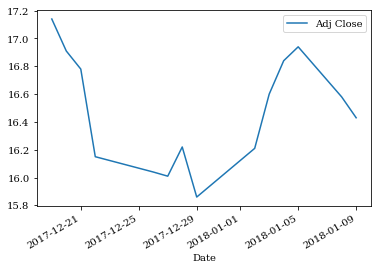

In [26]:
get_stock_data(symbol = 'PSTG', start = '2017-12-20', end = '2018-01-10').plot()